# 1. Import Necessary Libraries

Make sure  Microsoft Visual C++ is installed on your pc

Extracting text from pdf and converting to csv

In [66]:
import pdfplumber
import pandas as pd
import os
import re
from collections import Counter
import nltk
from wordsegment import load, segment

# Ensure nltk sentence tokenizer is downloaded
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Load English word segmentation model
load()

# Folder containing the PDFs
pdf_folder = r"C:\Users\sadik\OneDrive\Documenten\Howest\semester6\AI_project\studies\studies"
output_csv_path = r"C:\Users\sadik\OneDrive\Documenten\Howest\semester6\AI_project\Project\all_sentences.csv"

# Function to split long merged words into meaningful words
def split_long_words(text):
    if not isinstance(text, str):
        return text  # Return as is if not a string
    
    words = text.split()  # Split text into individual words
    processed_text = []

    for word in words:
        if len(word) > 10:  # Threshold for long words
            segmented_word = " ".join(segment(word))  # Use wordsegment to break into words
            processed_text.append(segmented_word)
        else:
            processed_text.append(word)
    
    return " ".join(processed_text)

# Function to extract and clean sentences from a PDF
def extract_clean_sentences_from_pdf(pdf_path):
    text_data = []
    headers = Counter()
    footers = Counter()
    filename = os.path.basename(pdf_path)  # Extract file name

    with pdfplumber.open(pdf_path) as pdf:
        # Detect common headers/footers
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                if len(lines) > 2:
                    headers[lines[0]] += 1  # First line as potential header
                    footers[lines[-1]] += 1  # Last line as potential footer

        # Identify the most common header/footer
        common_header = headers.most_common(1)[0][0] if headers else ""
        common_footer = footers.most_common(1)[0][0] if footers else ""

        # Extract and clean text
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            if text:
                lines = text.split("\n")

                # Remove detected headers and footers
                if len(lines) > 2:
                    if lines[0] == common_header:
                        lines.pop(0)  # Remove header
                    if lines[-1] == common_footer:
                        lines.pop(-1)  # Remove footer

                # Join cleaned lines back into text
                cleaned_text = "\n".join(lines)

                # Further cleanup: remove excessive spaces, page numbers, and metadata
                cleaned_text = re.sub(r"\s{2,}", " ", cleaned_text)  # Remove extra spaces
                cleaned_text = re.sub(r"Page \d+", "", cleaned_text)  # Remove page numbers
                cleaned_text = re.sub(r"\n+", " ", cleaned_text)  # Remove extra line breaks

                # Tokenize into sentences
                sentences = sent_tokenize(cleaned_text.strip())

                # Save each sentence as a separate row with filename
                for sentence in sentences:
                    cleaned_sentence = split_long_words(sentence)  # Apply word segmentation
                    text_data.append({
                        "filename": filename,
                        "Page": page_num + 1,
                        "sentence": cleaned_sentence
                    })

    return text_data

# Function to process all PDFs in the folder and save to CSV
def process_all_pdfs(pdf_folder, output_csv_path):
    all_text_data = []

    # Loop through all PDF files in the folder
    for pdf_file in os.listdir(pdf_folder):
        if pdf_file.endswith(".pdf"):  # Only process PDF files
            pdf_path = os.path.join(pdf_folder, pdf_file)
            print(f" Processing: {pdf_file}")
            text_data = extract_clean_sentences_from_pdf(pdf_path)
            all_text_data.extend(text_data)  # Append extracted text

    # Save to a single CSV file
    df = pd.DataFrame(all_text_data)

    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)

    df.to_csv(output_csv_path, index=False, encoding='utf-8')
    print(f"All PDFs processed! CSV saved at: {output_csv_path}")

# Run the function to process all PDFs
process_all_pdfs(pdf_folder, output_csv_path)

# Load CSV and display first few rows
df = pd.read_csv(output_csv_path)

# Display the cleaned DataFrame
print(" Extracted and Cleaned Sentences DataFrame:")
display(df.head())  # Display the first few rows of cleaned sentences


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Processing: Advantages of mixed-age free play in elementary.pdf
 Processing: Age of Peers and Early Childhood Development.pdf
 Processing: Classroom age composition and preschoolers’ language and literacy gains The role of classroom engagement.pdf
 Processing: Classroom Age Composition and Preschoolers’ School Readiness the implications of classroom quality and teachers qualifications.pdf
 Processing: Classroom age composition and rates of change in school readiness for children.pdf
 Processing: Classroom age composition and the early learning of preschoolers.pdf
 Processing: Classroom Age Composition and the schoolreadiness.pdf
 Processing: Classroom Age Composition and Vocabulary Development Among At-Risk Preschoolers.pdf
 Processing: Classroom_age_composition_and_developmental change in 70 urban preschool classrooms.pdf
 Processing: Collaborative literacy activity in print-enriched play center exploring the zone in same age and multi age goruping.pdf
 Processing: Comparing peer int

,filename,Page,sentence
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...
1,Advantages of mixed-age free play in elementar...,1,Submit your article to this journal Article vi...
2,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...
3,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...
4,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...


# 2.  Load Your Data

Load the articles from your CSV file using pandas. 

In [19]:
import pandas as pd

# Load the data
df= pd.read_csv(r'C:\Users\sadik\OneDrive\Documenten\Howest\semester6\AI_project\project\all_sentences.csv')
df.head()

,filename,Page,sentence
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...
1,Advantages of mixed-age free play in elementar...,1,Submit your article to this journal Article vi...
2,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...
3,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...
4,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...


### Removing any personal informtion to anonymize data  

In [20]:
import spacy
import re
import pandas as pd

# Load spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Function to remove personal names, dates, and numbers
def remove_sensitive_info(text):
    if not isinstance(text, str):
        return ""  # Handle non-string values

    doc = nlp(text)

    # Remove PERSON names using spaCy NER
    words = [token.text for token in doc if token.ent_type_ != "PERSON"]

    # Remove dates and numbers
    cleaned_text = " ".join(words)
    cleaned_text = re.sub(r'\b\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\b', '', cleaned_text)  # Remove dates (YYYY-MM-DD, DD/MM/YYYY)
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)  # Remove standalone numbers

    return cleaned_text.strip()

# Apply function to remove names, personal info, dates, and numbers from df['sentence_clean']
df['sentence_clean'] = df['sentence'].apply(remove_sensitive_info)

# Display cleaned dataframe
display(df.head())


,filename,Page,sentence,sentence_clean
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...,ISSN : ( Print ) ( Online ) Journal homepage :...
1,Advantages of mixed-age free play in elementar...,1,Submit your article to this journal Article vi...,Submit your article to this journal Article vi...
2,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...,international journal of play 2021vol10no17592...
3,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...,This research is a case study of one New York ...
4,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...,The school has implemented Let Grow Play club ...


# 3. Prepare Your Text Data
We clean up the text
- Remove the name of city, country, geography for better outcome
- Remove special characters (only letters)
- Convert to lower case
- Remove stop words
- Remove words of only one or 2 letters ('a', 'I', at,...)
- Remove very short sentences
- Remove urls 
- use stemming
- do duplicate sentences




In [21]:
import spacy
import pandas as pd

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Function to remove geographic entities (cities, countries, locations)
def remove_geographical_entities(text):
    if not isinstance(text, str):
        return ""  # Handle missing or non-string values
    
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.ent_type_ not in ["GPE", "LOC", "FAC"]]
    
    return " ".join(filtered_tokens)

# Apply function to remove cities, countries, and geography
df['sentence_clean'] = df['sentence'].apply(remove_geographical_entities)

# Display a few cleaned sentences
df.head()


,filename,Page,sentence,sentence_clean
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...,ISSN : ( Print ) ( Online ) Journal homepage :...
1,Advantages of mixed-age free play in elementar...,1,Submit your article to this journal Article vi...,Submit your article to this journal Article vi...
2,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...,international journal of play 2021vol10no17592...
3,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...,This research is a case study of one public el...
4,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...,The school has implemented Let Grow Play club ...


In [22]:
import re
import unicodedata
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import download
from collections import Counter

# Ensure necessary NLTK resources are downloaded
download('wordnet')
download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Retain important stopwords (do NOT remove these)
important_stopwords = {
    # Negation Words (Critical for meaning)
    "not", "never", "nor", "no",
    # Modality Words (Possibility/Necessity)
    "can", "could", "should", "would", "may", "might", "must",
    # Quantifiers (Define amounts)
    "all", "any", "some", "many", "much", "few", "more", "most", "several", "less", "least",
    # Time References (Useful for context)
    "before", "after", "since", "until", "while", "when", "then",
    # Comparative Words (Relative meaning)
    "than", "as", "like"
}
# Remove all stopwords **except** the important ones
stop_words -= important_stopwords

# Minimum word length threshold
minWordSize = 4

# Initialize the WordNetLemmatizer and PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Preprocessing function to clean sentences
def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # Handle missing or non-string values
    
    # Remove URLs (http, https, www, etc.)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Normalize Unicode characters
    text = unicodedata.normalize('NFKD', text)
    
    # Replace non-alphabetic characters with a space
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Convert text to lowercase and split into words
    words = text.lower().split()

    # Remove stopwords except for retained important ones
    filtered_words = [word for word in words if word not in stop_words]

    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Apply stemming after lemmatization
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Remove short words after stopword removal, except retained important words
    final_words = [w for w in stemmed_words if len(w) >= minWordSize or w in important_stopwords]

    # Remove duplicate words within each sentence (preserving order)
    unique_words = list(dict.fromkeys(final_words))

    # Ensure proper spacing between words
    return " ".join(unique_words)

# Apply preprocessing function to clean sentences
df['sentence_clean'] = df['sentence_clean'].apply(preprocess_text)

# Identify and remove duplicate sentences
sentence_counts = Counter(df['sentence_clean'])

# Remove sentences that appear multiple times
df = df[df['sentence_clean'].map(sentence_counts) == 1]

# Display the first elements after processing
df.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sadik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,filename,Page,sentence,sentence_clean
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...,issn print onlin journal homepag tandfonlineco...
2,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...,intern journal play no advantag free elementar...
3,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...,research case studi public elementari school p...
4,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...,school implement grow play club befor week stu...
5,Advantages of mixed-age free play in elementar...,2,We use child interviews teacher interviews and...,child interview teacher parent survey examin p...


In [23]:
df['sentence_clean'].is_unique

True

In [24]:
df = df[df['sentence_clean'].str.len() >=10]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9215 entries, 0 to 11968
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename        9215 non-null   object
 1   Page            9215 non-null   int64 
 2   sentence        9215 non-null   object
 3   sentence_clean  9215 non-null   object
dtypes: int64(1), object(3)
memory usage: 360.0+ KB


### To see how data cleaning looks 

In [ ]:
import os

# Define the filename for the cleaned data
output_filename = "cleaned_data.csv"

# Get the current folder path
current_folder = os.getcwd()

# Full path to save the file
output_path = os.path.join(current_folder, output_filename)

# Save the cleaned DataFrame to CSV
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Cleaned data saved at: {output_path}")

### Read the clean data 

In [28]:
import pandas as pd

# Load the data
df= pd.read_csv(r'C:\Users\sadik\OneDrive\Documenten\Howest\semester6\AI_project\project\cleaned_data.csv')
df.head()

,filename,Page,sentence,sentence_clean
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...,issn print onlin journal homepag tandfonlineco...
1,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...,intern journal play no advantag free elementar...
2,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...,research case studi public elementari school p...
3,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...,school implement grow play club befor week stu...
4,Advantages of mixed-age free play in elementar...,2,We use child interviews teacher interviews and...,child interview teacher parent survey examin p...


# 4. Initialize and Fit BERTopic
The good thing with BERTopic is that is does most of the work automatically (Meaning, I do not need to bore you to death with details about how it works behind te scenes.)

We need to do 3 things
1. Initialize BERTopic model
2. 'Fit' the model -> this  means: run the model, as you would run a simple linear regression
3. Look at the topics via 

To get started, let's just use the default settings.

In [29]:
unique_filenames_count = df['filename'].nunique()
print(unique_filenames_count)

30


In [30]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize BERTopic model
topic_model = BERTopic(calculate_probabilities=True)

# Fit the model with preprocessed text sentences
topics, probabilities = topic_model.fit_transform(df['sentence_clean'])

# View and inspect topics
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4794,-1_classroom_child_studi_teacher,"[classroom, child, studi, teacher, peer, year,...",[anoth exampl teacher serv class room larger p...
1,0,226,0_caregiv_care_qualiti_profession,"[caregiv, care, qualiti, profession, character...",[discuss present studi first examin multipl de...
2,1,189,1_brook_yoshikawa_thompson_clifford,"[brook, yoshikawa, thompson, clifford, lonigan...",[yoshikawa weiland brook burch espinosa gormle...
3,2,189,2_speech_privat_regulatori_regul,"[speech, privat, regulatori, regul, self, cont...",[no differ overal amount privat speech observ ...
4,3,170,3_slope_model_intercept_score,"[slope, model, intercept, score, estim, level,...",[relat estim repres maximum likelihood popul s...
...,...,...,...,...,...
127,126,11,126_benefit_acquisi_grueneich_preschool,"[benefit, acquisi, grueneich, preschool, expen...",[although no great benefit previou research li...
128,127,11,127_numeraci_approach_emot_domain,"[numeraci, approach, emot, domain, gresham, em...",[first studi interv level data examin associ c...
129,128,10,128_moller_informauk_trade_taylor,"[moller, informauk, trade, taylor, franci, con...","[interest moller, critic think contact heather..."
130,129,10,129_room_hostil_unequivoc_modular,"[room, hostil, unequivoc, modular, ceiv, devis...",[interestingli also more like receiv hostil th...


we get here too much topics  132, later we can make sure that the topic are limited to certain number of topics for better analysis and understanding


In [31]:
# Initialize BERTopic model
topic_model = BERTopic(calculate_probabilities=True, min_topic_size=10, nr_topics=20)

# Fit the model with preprocessed text sentences
topics, probabilities = topic_model.fit_transform(df['sentence_clean'])

# View and inspect topics
topic_model.get_topic_info()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,4637,-1_child_classroom_teacher_group,"[child, classroom, teacher, group, studi, year...",[data famili child experi survey cohort studi ...
1,0,3050,0_child_classroom_behavior_interact,"[child, classroom, behavior, interact, prescho...",[recent rigor research found no signifi gest c...
2,1,430,1_studi_data_phonolog_awar,"[studi, data, phonolog, awar, analysi, miss, v...",[outcom recept express phonolog print predicto...
3,2,355,2_jecresq_fantuzzo_mashburn_downer,"[jecresq, fantuzzo, mashburn, downer, justic, ...","[hamr downer mashburn, mashburn justic downer ..."
4,3,129,3_observ_code_videotap_camera,"[observ, code, videotap, camera, record, video...","[observ behavior checklist record, observ stud..."
5,4,74,4_educ_earli_research_journal,"[educ, earli, research, journal, nation, devel...","[educ develop, journal educ research, earli educ]"
6,5,70,5_interact_neutral_facial_smile,"[interact, neutral, facial, smile, express, af...",[construct control domin neutral follow intera...
7,6,68,6_year_month_averag_begin,"[year, month, averag, begin, differ, date, nin...","[begin school year child averag month rang, av..."
8,7,66,7_journal_publish_articl_intern,"[journal, publish, articl, intern, access, gro...",[journal knowledg commun membership first publ...
9,8,61,8_priscilla_ginger_sophia_cook,"[priscilla, ginger, sophia, cook, look, preten...",[exampl priscilla grade sophia kitchen tabl wr...


In [34]:
topic_model.topics_[:20]

[-1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0]

### Here we reduce the number of topics with the number of pdf files we have uploaded

In [35]:
topics = int(unique_filenames_count)
topic_model = BERTopic().fit(df['sentence_clean'])
topic_model.reduce_topics(df['sentence_clean'], nr_topics=(topics))

In [37]:
print(topic_model.topics_)

[-1, -1, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, 1, -1, -1, -1, -1, -1, -1, 0, -1, 20, 0, 0, -1, -1, -1, -1, -1, -1, 0, 9, -1, -1, 0, 0, 26, -1, 0, 0, -1, -1, 0, 1, -1, 0, 0, -1, -1, -1, 0, 0, -1, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1, 0, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, -1, -1, 0, 0, -1, 1, -1, -1, -1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, 0, 6, 0, 1, -1, -1, -1, 0, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 17, -1, -1, 0, 0, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, 1, 0, 1, 1, -1, 1, 0, 0, -1, 9, -1, -1, 8, 0, -1, 9, -1, 1, 0, -1, -1, 8, -1, 0, 1, 0, 7, 1, 18, 0, 8, -1, 8, 1, 9, -1, 0, -1, -1, 0, 1, -1

### Here we can search an attribute that is related to certain topics

In [38]:
similar_topics, similarity = topic_model.find_topics("stress"); similar_topics

[4, 5, 1, 22, 2]

In [39]:
similar_topics, similarity = topic_model.find_topics("happy"); similar_topics

[1, 12, 10, 5, 24]

In [41]:
topic_model.get_topic(16)

[('head', np.float64(0.3310727498429481)),
 ('start', np.float64(0.30757871542277)),
 ('program', np.float64(0.1467779007096378)),
 ('state', np.float64(0.05755421496453629)),
 ('grante', np.float64(0.05237100359350525)),
 ('across', np.float64(0.051325884942266024)),
 ('school', np.float64(0.0509420084068297)),
 ('year', np.float64(0.04888799344295829)),
 ('sampl', np.float64(0.04283343133823379)),
 ('detail', np.float64(0.04139301415062426))]

### topic limited to the pdf count

In [42]:
topic_model.get_topic(30)

False

# 5. Visualize Topics
We can call .visualize_topics to create a 2D representation of the topics. The  graph is a plotly interactive graph which can be converted to HTML:

Note: If you get the error 'ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed', go to terminal and type 'pip install --upgrade nbformat  ' 

In [43]:
# Visualize topics with an interactive plot
topic_model.visualize_topics()

You can use the slider to select the topic which then lights up red. If you hover over a topic, then general information is given about the topic, including the size of the topic and its corresponding words.

We can also ask for a representation of the corresponding words for each topic:

In [44]:
topic_model.visualize_barchart()

# 6. Visualize Topic Hierarchy¶
The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. We can also see what happens to the topic representations when merging topics. 

In [45]:
hierarchical_topics = topic_model.hierarchical_topics(df['sentence_clean'])
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


100%|██████████| 28/28 [00:00<00:00, 135.40it/s]


If you hover over the black circles, you will see the topic representation at that level of the hierarchy. These representations help you understand the effect of merging certain topics. Some might be logical to merge whilst others might not. Moreover, we can now see which sub-topics can be found within certain larger themes.

You can also print a text-version of the topic representation at the different levels (a bit less pretty, but maybe easier to read.)

In [46]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)


.
├─child_classroom_behavior_interact_teacher
│    ├─collabor_group_evid_multi_best
│    │    ├─collabor_group_novic_literaci_activ
│    │    │    ├─■──activ_type_literaci_stone_durat ── Topic: 27
│    │    │    └─■──collabor_group_novic_expert_multi ── Topic: 9
│    │    └─■──evid_synthesi_best_multigrad_class ── Topic: 20
│    └─child_classroom_behavior_interact_teacher
│         ├─■──tabl_descript_statist_shown_result ── Topic: 11
│         └─child_classroom_behavior_interact_teacher
│              ├─child_classroom_behavior_interact_teacher
│              │    ├─■──year_month_averag_differ_like ── Topic: 10
│              │    └─child_classroom_behavior_interact_teacher
│              │         ├─child_classroom_behavior_teacher_interact
│              │         │    ├─■──observ_code_camera_videotap_video ── Topic: 6
│              │         │    └─child_classroom_behavior_teacher_interact
│              │         │         ├─■──data_miss_analysi_model_test ── Topic: 3
│           

# 7. Visualize documents

We can visualize the documents (=texts) inside the topics to see if they were assigned correctly or whether they make sense. To do so, we can use the topic_model.visualize_documents() function. This function recalculates the document embeddings and reduces them to 2-dimensional space for easier visualization purposes. 

In [47]:
df = df.reset_index(drop=True)  # Reset index to avoid KeyError
topic_model.visualize_documents(df['sentence'].tolist())  # Convert Series to list


When you hover over a point, you can see which text it is. The color tells you to which topic it belongs. While this is very pretty, it might be useful to be able to just open an excel-file or csv, which contains the original text, with the assigned topic, including the topic words:

In [48]:
import numpy as np
# Add topics and probabilities to the original DataFrame
df["topic_number"] = np.argmax(probabilities, axis=1)

# Also extract the topic names and assign them to the DataFrame
info = topic_model.get_topic_info()
topic_names = info['Representation']

df['topic_name'] = df['topic_number'].map(topic_names)

# Save the updated DataFrame to a CSV

df['topic_name'] = df['topic_number'].map(topic_names)

# Save to a new CSV file
df.to_csv("studies_lobke_with_topics.csv", index=False)


In [49]:
df.head()

,filename,Page,sentence,sentence_clean,topic_number,topic_name
0,Advantages of mixed-age free play in elementar...,1,ISSN: (Print) (Online) Journal homepage: https...,issn print onlin journal homepag tandfonlineco...,0,"[child, classroom, studi, group, year, teacher..."
1,Advantages of mixed-age free play in elementar...,2,international journal of play 2021vol10no17592...,intern journal play no advantag free elementar...,0,"[child, classroom, studi, group, year, teacher..."
2,Advantages of mixed-age free play in elementar...,2,This research is a case study of one New York ...,research case studi public elementari school p...,0,"[child, classroom, studi, group, year, teacher..."
3,Advantages of mixed-age free play in elementar...,2,The school has implemented Let Grow Play club ...,school implement grow play club befor week stu...,0,"[child, classroom, studi, group, year, teacher..."
4,Advantages of mixed-age free play in elementar...,2,We use child interviews teacher interviews and...,child interview teacher parent survey examin p...,0,"[child, classroom, studi, group, year, teacher..."


We can also see the topic distribution per document = the probability that the text belongs to each topic (if a topic is not included in the graph, the probability is 0). Eg, the topic distribution for the sixth document:(!python starts counting at 0, so 6th =5)

In [60]:
topic_model.visualize_distribution(probabilities[300])

# 8. Topics per full article

We extract the number of times a topic is assigned within the full articles.

                                                    Topic 0  Topic 1  Topic 2  \
filename                                                                        
Advantages of mixed-age free play in elementary...      305        2        8   
Age of Peers and Early Childhood Development.pdf        288        7        8   
Classroom Age Composition and Preschoolers’ Sch...      319        4       10   
Classroom Age Composition and Vocabulary Develo...      249        4       11   
Classroom Age Composition and the schoolreadine...      246        4       12   
Classroom age composition and preschoolers’ lan...      379       11       18   
Classroom age composition and rates of change i...      413       11       25   
Classroom age composition and the early learnin...      227        6       11   
Classroom_age_composition_and_developmental cha...      316        3       17   
Collaborative literacy activity in print-enrich...      377       14       13   
Comparing peer interactions,

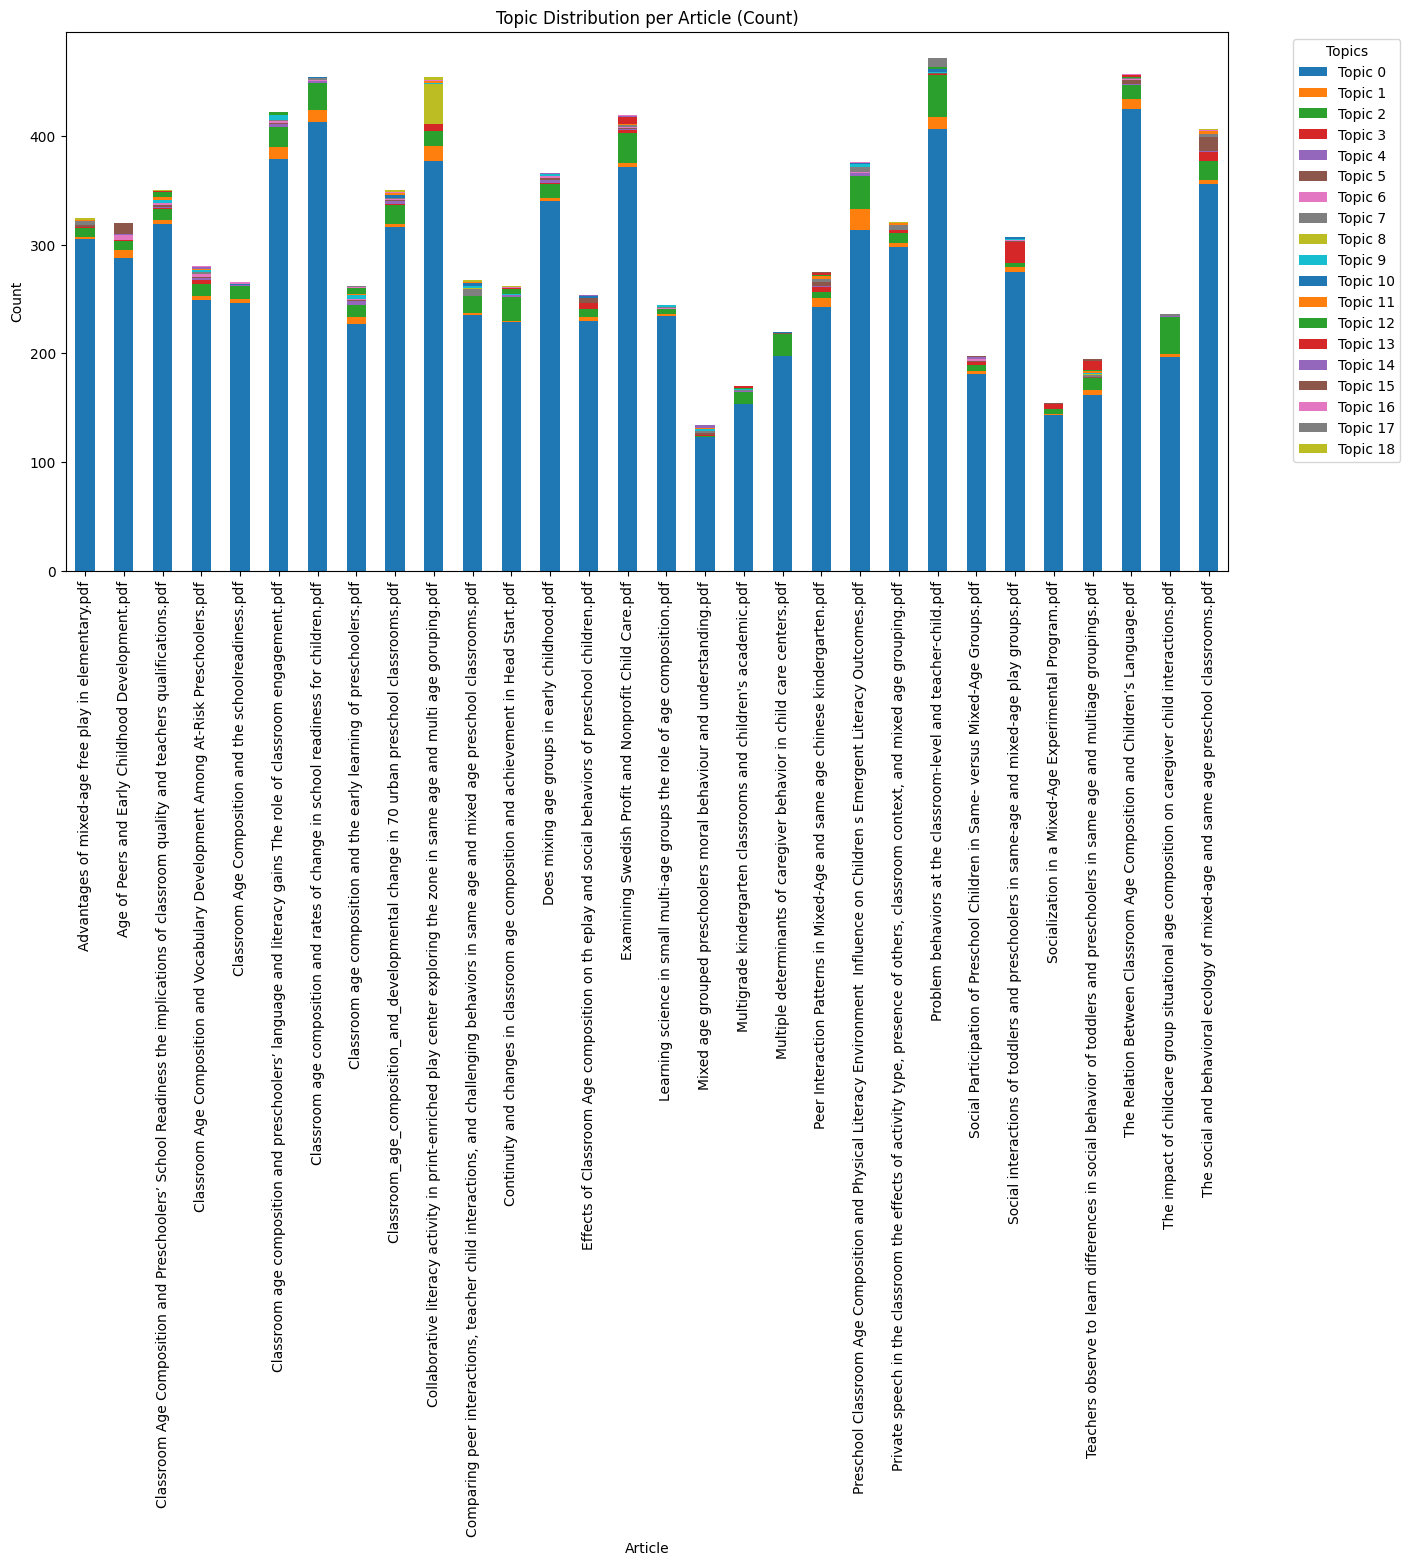

In [61]:
import matplotlib.pyplot as plt

# Calculate the count of times each topic is chosen within each article
article_topic_counts = df.groupby('filename')['topic_number'].value_counts().unstack(fill_value=0)

# Rename columns to 'Topic X'
article_topic_counts.columns = [f'Topic {i}' for i in article_topic_counts.columns]

# Display the table
print(article_topic_counts)

# Plot the distribution for each article
article_topic_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Topic Distribution per Article (Count)')
plt.xlabel('Article')
plt.ylabel('Count')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We could also do the same, but with proportions in stead of counts.

                                                     Topic 0   Topic 1  \
filename                                                                 
Advantages of mixed-age free play in elementary...  0.941358  0.006173   
Age of Peers and Early Childhood Development.pdf    0.900000  0.021875   
Classroom Age Composition and Preschoolers’ Sch...  0.911429  0.011429   
Classroom Age Composition and Vocabulary Develo...  0.889286  0.014286   
Classroom Age Composition and the schoolreadine...  0.924812  0.015038   
Classroom age composition and preschoolers’ lan...  0.898104  0.026066   
Classroom age composition and rates of change i...  0.909692  0.024229   
Classroom age composition and the early learnin...  0.866412  0.022901   
Classroom_age_composition_and_developmental cha...  0.902857  0.008571   
Collaborative literacy activity in print-enrich...  0.830396  0.030837   
Comparing peer interactions, teacher child inte...  0.880150  0.007491   
Continuity and changes in classroom ag

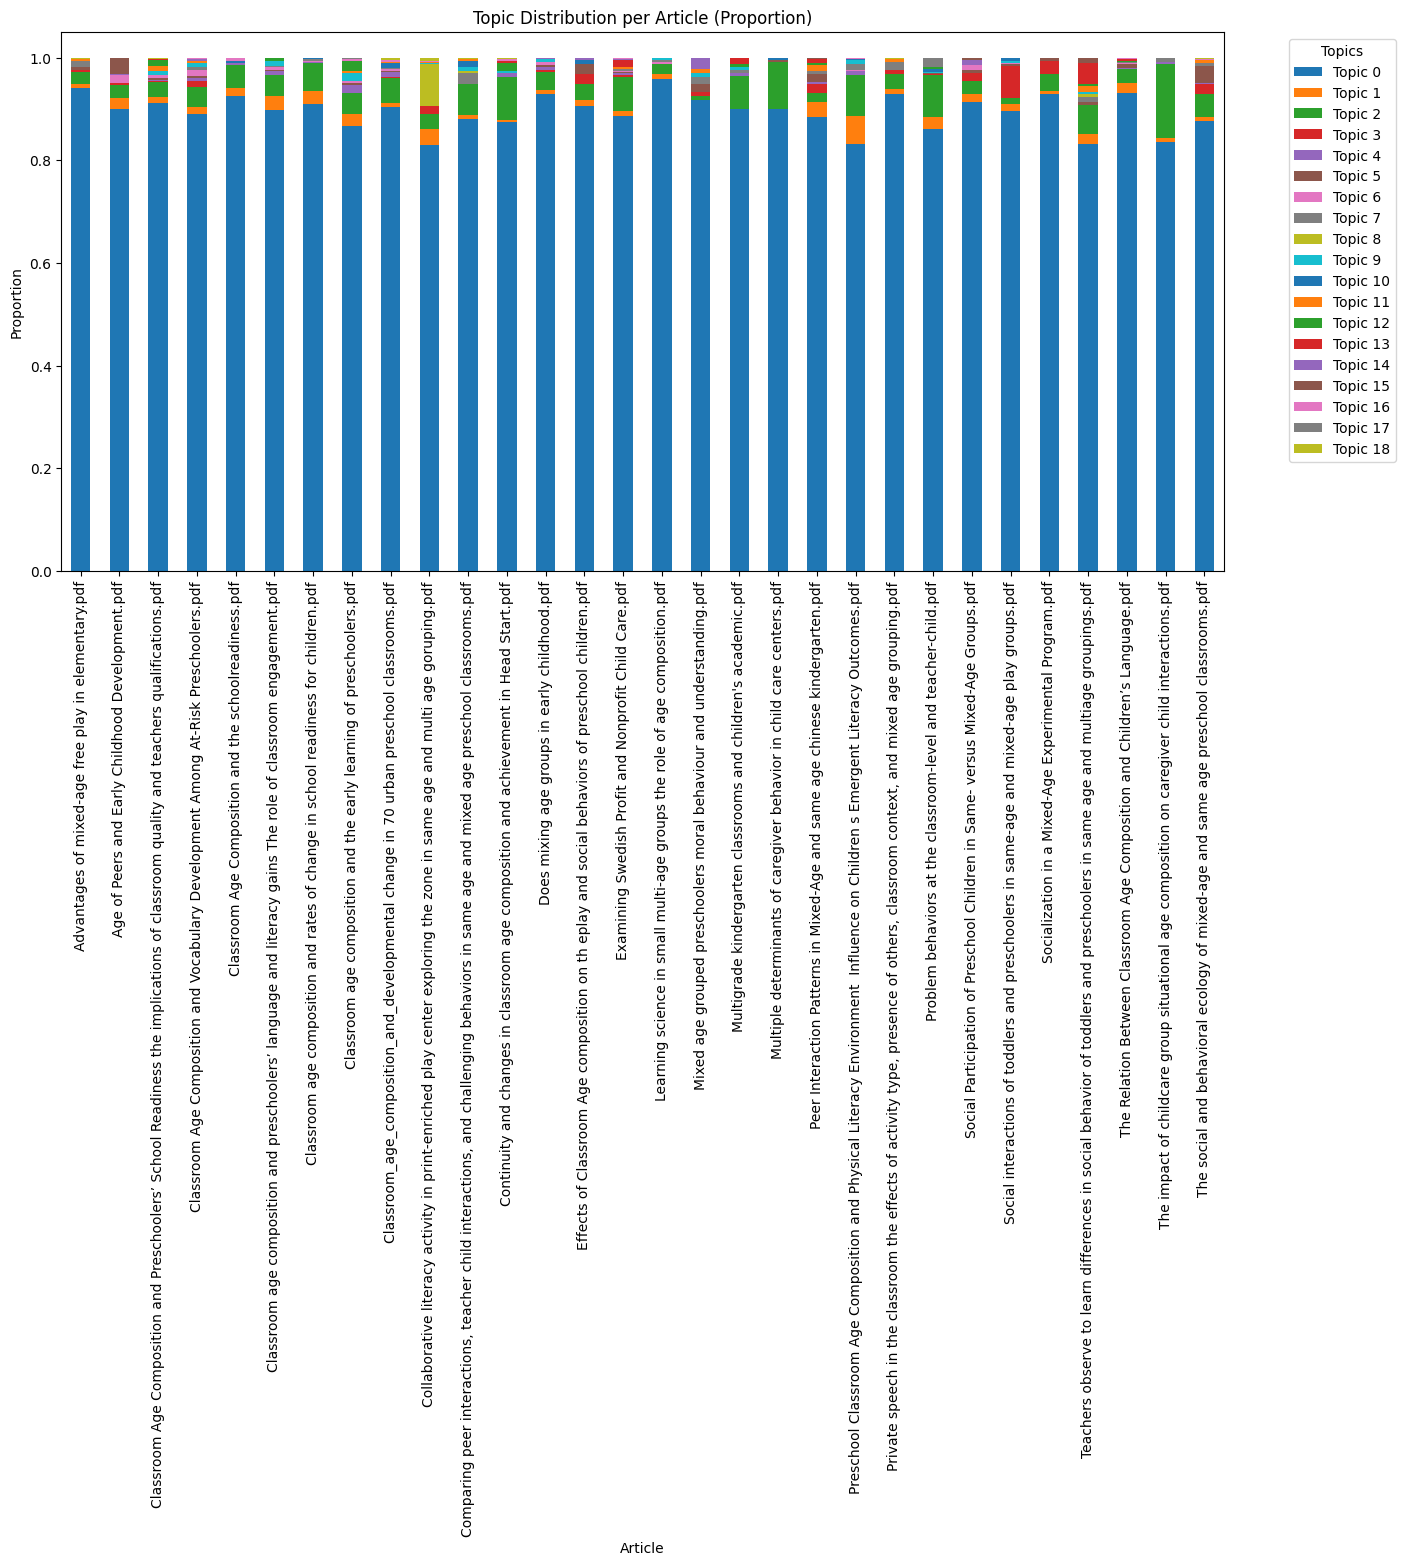

In [62]:
import matplotlib.pyplot as plt

# Calculate the proportion of times each topic is chosen within each article
article_topic_proportions = df.groupby('filename')['topic_number'].value_counts(normalize=True).unstack(fill_value=0)

# Rename columns to 'Topic X'
article_topic_proportions.columns = [f'Topic {i}' for i in article_topic_proportions.columns]

# Display the table
print(article_topic_proportions)

# Plot the distribution for each article
article_topic_proportions.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Topic Distribution per Article (Proportion)')
plt.xlabel('Article')
plt.ylabel('Proportion')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 The highest related topic is child_classroom_behavior it makes sense because we are working with data to see how childeren change of what effects the psychology of child after finishing the elementary school and entering to high school.

In [63]:
import nbformat
from nbconvert import PythonExporter

# Replace 'YourNotebookName.ipynb' with the actual filename of your notebook.
notebook_filename = "BERTtopic.ipynb"  
output_filename = notebook_filename.replace(".ipynb", ".py")

# Read the notebook file
with open(notebook_filename, encoding="utf-8") as f:
    nb_node = nbformat.read(f, as_version=4)

# Use PythonExporter to convert the notebook to a Python script
python_exporter = PythonExporter()
(script, resources) = python_exporter.from_notebook_node(nb_node)

# Write the converted Python code to a .py file
with open(output_filename, "w", encoding="utf-8") as f:
    f.write(script)

print(f"Notebook has been saved as {output_filename}")


Notebook has been saved as BERTtopic.py
